**EDA recepes and reviews datasets- Executive summary**

**I-  Correlation between features and average rating**

1. Simplification of the dataset 
   
In our merged dataset genearated from the data wrangling, each recepes with numerical features and categorical features, and the review rating from each reviewers that gave a rating. We also previousely calculated the average rating and will use this as target feature.

We will only use the average rating for each recepe and discard each rating from each reviewers

**RESULTS: Generation of "df_singlet dataset" dataframe**

2. How does numerical features of the recepes correlated with the average ratings? 

A- Is there a correlation between complexity of a recepe and its average rating? :
- Ingredients counts/recepe ('ingredient_count')
- Description length: ('description_length')
- Instruction length: 'Instruction_length'
- Duration: ('TotalTimeMinutes') 

**RESULTS: we did not find any correlation with the average rating!**
        
B- Is there a correlation between nutrient composition and calories? investigation of correlation significance and and p-values estimation.
- 'Calories' 
- 'FatContent'
- 'SaturatedFatContent'
- 'CholesterolContent'
- 'SodiumContent'
- 'CarbohydrateContent'
- 'FiberContent' 
- 'SugarContent'
- 'ProteinContent'
        
**RESULTS: we did not find any correlation with the average ratings but we found that:**
**- Calories are more corellated to sugar contents than fat content**
**- calories are more related to protein and fiber than fat**

    
C- Statistical analysis:
- Investigate the distribution of the target features
- Investigate significance of the pearson correlation coef between nutrient features and calories using permutation strategy. We will consider Null hypothesis H0 = there are no differences between pearson correlation coefficient with permutated data vs real data and we will compute p-values using the correct test based on a normal distribution.
- We can observe different level of correlation between the nutrient conctents features and we will investigate significance of the difference. We will consider Null hypothesis H0 = there are no differences between pearson correlation coefficient and we will compute p-values using the correct test based on a normal distribution.

**RESULTS:**
**- pearson correlation coefficients between nutrient features and calories are significant (small p-values)**
**- different level of correlation between the nutrient conctents features are significance (small p-values)**
        
**II-  Creation of Ingredient clusters for recepe recommendation model**

- Standardization of the ingredient names using the pyfood library
- Clustering recepes according to ingredient list
- Top 10 ingredient from each cluster
- Generate the final dataframe for regression model to recommend recepes to the reviewers based on ingredient list. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from collections import Counter



In [3]:
# import the dataframe
df = pd.read_pickle('/Users/shendong/Desktop/Springboard_local/Springboard_old/data capstone 2/merged_df')

In [4]:
#summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864122 entries, 0 to 864121
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype              
---  ------                      --------------   -----              
 0   RecipeId                    864122 non-null  float64            
 1   Name                        864122 non-null  object             
 2   AuthorId_recipe             864122 non-null  int64              
 3   AuthorName_recipe           864122 non-null  object             
 4   TotalTime                   864122 non-null  object             
 5   DatePublished               864122 non-null  datetime64[ns, UTC]
 6   Description                 864122 non-null  object             
 7   RecipeCategory              864122 non-null  object             
 8   Keywords                    864122 non-null  object             
 9   RecipeIngredientQuantities  864122 non-null  object             
 10  RecipeIngredientParts       864122 non-null 

**I-  Correlation between features and average rating**

1. Simplification of the dataset 

In [5]:
#dropping off some unused columns
df = df.drop(['Name', 'AuthorName_recipe', 'Description', 'TotalTime','DateSubmitted', 'DateModified'], axis =1)

In [6]:
df.shape

(864122, 27)

In [7]:
#remove recepe multiplicate (each recepe was listed with individual rating from different reviewers)
df_singlet = df.drop_duplicates(subset=['RecipeId', 'AuthorId_recipe', 'DatePublished', 'RecipeCategory',
       'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent',
       'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent',
       'ProteinContent', 'RecipeServings', 'RecipeInstructions',
       'TotalTimeMinutes', 'description_length'], keep='first')

In [8]:
#check dataframe shape to verify if the drop_duplicate worked
df_singlet.shape

(172299, 27)

2. How does numerical features of the recepes correlated with the average ratings? 

In [9]:
#create features linked to complexity of a recepe
#Instruction length
df_singlet['Instruction_length'] = df_singlet['RecipeInstructions'].str.len()
df_singlet['Instruction_length']

/var/folders/dt/t3ds7b0j66d_kpdgqfq1qtcm0000gn/T/ipykernel_51540/12009916.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_singlet['Instruction_length'] = df_singlet['RecipeInstructions'].str.len()


0          9
4         11
5          5
14        15
16         4
          ..
864117     6
864118     6
864119     3
864120     2
864121     2
Name: Instruction_length, Length: 172299, dtype: int64

In [10]:
#create features linked to complexity of a recepe
#Ingredient counts
df_singlet['ingredient_count'] = df_singlet['RecipeIngredientParts'].apply(len)

/var/folders/dt/t3ds7b0j66d_kpdgqfq1qtcm0000gn/T/ipykernel_51540/1695022226.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_singlet['ingredient_count'] = df_singlet['RecipeIngredientParts'].apply(len)


In [11]:
#create features linked to complexity of a recepe
#Instruction length
df_singlet['Review_length'] = df_singlet['Review'].apply(len)

/var/folders/dt/t3ds7b0j66d_kpdgqfq1qtcm0000gn/T/ipykernel_51540/3205783588.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_singlet['Review_length'] = df_singlet['Review'].apply(len)


In [12]:
df_singlet.columns

Index(['RecipeId', 'AuthorId_recipe', 'DatePublished', 'RecipeCategory',
       'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent',
       'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent',
       'ProteinContent', 'RecipeServings', 'RecipeInstructions',
       'TotalTimeMinutes', 'description_length', 'ReviewId', 'AuthorId_review',
       'AuthorName_review', 'Rating', 'Review', 'average_rating',
       'rating_count', 'Instruction_length', 'ingredient_count',
       'Review_length'],
      dtype='object')

In [13]:
#making a dataframe with only the relevant features
df1 = df_singlet[['Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent', 'TotalTimeMinutes', 'description_length', 'average_rating', 'Instruction_length', 'ingredient_count']]
df1.columns

Index(['Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent',
       'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent',
       'ProteinContent', 'TotalTimeMinutes', 'description_length',
       'average_rating', 'Instruction_length', 'ingredient_count'],
      dtype='object')

<Axes: >

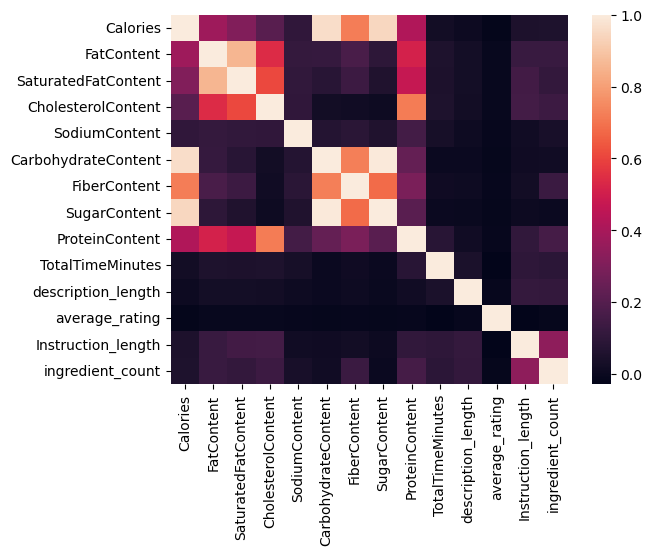

In [14]:
#generate correlation matrix and heatmap
correlation_matrix = df1.corr()

sns.heatmap(correlation_matrix)

In [34]:
correlation_matrix

,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,TotalTimeMinutes,description_length,average_rating,Instruction_length,ingredient_count
Calories,1.000000,0.377126,0.307980,0.205154,0.102865,0.961026,0.720247,0.947572,0.419207,0.020755,0.006841,-0.016968,0.048697,0.054740
FatContent,0.377126,1.000000,0.857112,0.539067,0.114504,0.118364,0.170298,0.094383,0.509980,0.051990,0.026684,-0.008524,0.124797,0.124705
SaturatedFatContent,0.307980,0.857112,1.000000,0.609623,0.105360,0.081363,0.132711,0.058483,0.473072,0.047787,0.023852,-0.007324,0.150769,0.110952
CholesterolContent,0.205154,0.539067,0.609623,1.000000,0.103162,0.023485,0.016121,0.010015,0.716085,0.052531,0.022516,-0.008498,0.153068,0.133547
SodiumContent,0.102865,0.114504,0.105360,0.103162,1.000000,0.069624,0.085446,0.057182,0.152386,0.032438,0.010735,-0.008847,0.018560,0.036094
CarbohydrateContent,0.961026,0.118364,0.081363,0.023485,0.069624,1.000000,0.724070,0.993942,0.239052,0.002380,-0.000439,-0.015770,0.013599,0.016654
FiberContent,0.720247,0.170298,0.132711,0.016121,0.085446,0.724070,1.000000,0.679949,0.292004,0.014993,0.011049,-0.010769,0.021727,0.129688
SugarContent,0.947572,0.094383,0.058483,0.010015,0.057182,0.993942,0.679949,1.000000,0.209916,0.002563,-0.002381,-0.012945,0.003964,-0.000337
ProteinContent,0.419207,0.509980,0.473072,0.716085,0.152386,0.239052,0.292004,0.209916,1.000000,0.080487,0.017860,-0.009569,0.104047,0.156713
TotalTimeMinutes,0.020755,0.051990,0.047787,0.052531,0.032438,0.002380,0.014993,0.002563,0.080487,1.000000,0.046659,-0.028677,0.098486,0.088420


there is no correlation with any of the features and the average ratings

B- Is there a correlation between nutrient composition and calories? investigation of correlation significance and and p-values estimation 

From previous correlation matrix we observed that:
- Calories are more corellated to sugar contents than Fat content
- calories are more related to protein and fiber than fat 

In [15]:
#simplify the datas by adding the different fat contents features together and same for the sugar contents features.
df_singlet['sugar'] = df_singlet['SugarContent'] + df_singlet['CarbohydrateContent']
df_singlet['fat'] = df_singlet['FatContent'] + df_singlet['SaturatedFatContent'] + df_singlet['CholesterolContent']

/var/folders/dt/t3ds7b0j66d_kpdgqfq1qtcm0000gn/T/ipykernel_51540/2589017498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_singlet['sugar'] = df_singlet['SugarContent'] + df_singlet['CarbohydrateContent']
/var/folders/dt/t3ds7b0j66d_kpdgqfq1qtcm0000gn/T/ipykernel_51540/2589017498.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_singlet['fat'] = df_singlet['FatContent'] + df_singlet['SaturatedFatContent'] + df_singlet['CholesterolContent']


In [16]:
#dataframe for correlation analysis
df_corr = df_singlet[['sugar', 'fat', 'SodiumContent', 'FiberContent', 'ProteinContent', 'Calories']]
df_corr.head()

,sugar,fat,SodiumContent,FiberContent,ProteinContent,Calories
0,67.3,11.8,29.8,3.6,3.2,170.9
4,104.8,448.2,368.4,9.0,63.4,1110.7
5,158.7,0.2,1.8,0.4,0.3,311.1
14,96.3,27.8,1558.6,17.3,29.3,536.1
16,42.8,0.5,959.3,4.8,4.3,103.6


<Axes: >

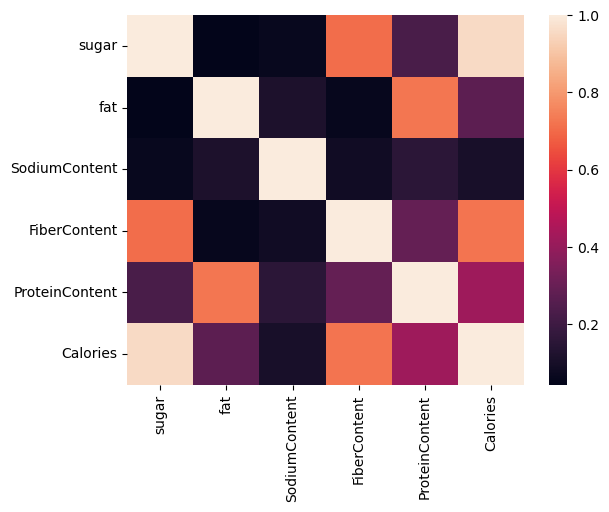

In [17]:


# look at the correlation matrix with the newly generated data 
correlation_matrix2 = df_corr.corr()

sns.heatmap(correlation_matrix2)

Results: We see the different level of correlation with calories. The order from less corelated to most corrleated sodium<fat<protein<fiber<sugar. 
As expected Sugar contents is the more correlated to calories than the other nutrients.


C- Statistical analysis:

- Investigating the distribution of the target features


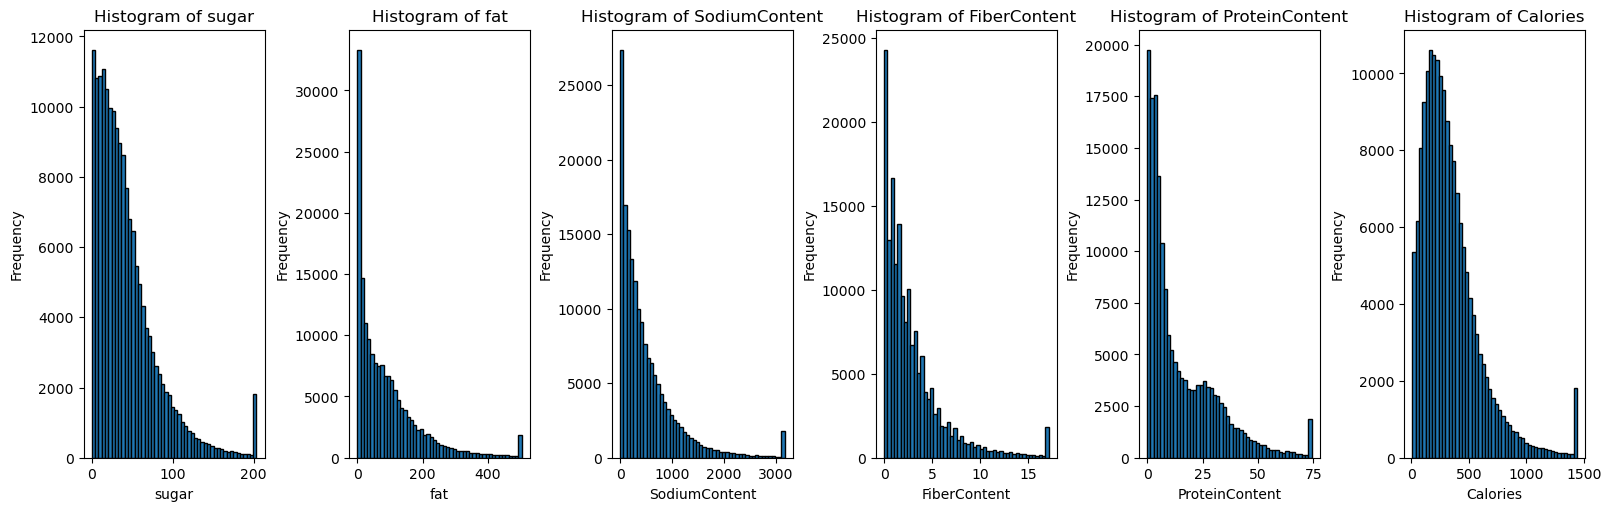

In [20]:
# Define percentiles to clip extreme values
lower_percentile = 1
upper_percentile = 99

df_test = df_corr.copy()
for column in df_corr.columns:
    lower_bound = df_corr[column].quantile(lower_percentile / 100)
    upper_bound = df_corr[column].quantile(upper_percentile / 100)
    df_test[column] = df_corr[column].clip(lower_bound, upper_bound)  # Clip extreme values

# Plot histograms with filtered data
num_columns = df_test.shape[1]
fig, axes = plt.subplots(nrows=1, ncols=num_columns, figsize=(16, 5), constrained_layout=True)

for i, column in enumerate(df_test.columns):
    axes[i].hist(df_test[column], bins=50, edgecolor='black')  # Reduce bins for better visibility
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.show()


In [73]:
df_corr.describe() 

,sugar,fat,SodiumContent,FiberContent,ProteinContent,Calories
count,172299.000000,172299.000000,172299.000000,172299.000000,172299.000000,172299.000000
mean,46.170408,94.075912,562.658015,3.046739,15.738497,356.275816
std,483.859338,132.558717,2706.561130,6.284793,22.402146,1118.094465
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.900000,16.400000,122.000000,0.800000,3.400000,165.000000
50%,33.500000,62.100000,324.900000,2.000000,8.800000,285.400000
75%,57.800000,129.300000,685.550000,3.900000,24.300000,448.100000
max,198976.900000,15622.500000,704129.600000,1748.600000,3270.300000,434360.200000


The data distribution could suggest a poisson distribution but the variance is much larger than the mean. (for a poisson distribution the std should be the square root of the mean). This suggests that the data may be modeled by Negative Binomial distribution, which can account for greater variance relative to the mean. 

- Next, we aim to investigate the significance of the Pearson correlation coefficient between nutrient content features and calorie values using a permutation-based strategy. The null hypothesis (H0​) states that there is no difference between the Pearson correlation coefficients obtained from the permuted data and the real data. To test this hypothesis, we will compute p-values based on the appropriate statistical test, assuming the z-score values follow a normal distribution under the null hypothesis.

In [39]:
from scipy.stats import pearsonr


#function that will generate pearson correlation coefficients between each columns of the dataframe
def calculate_pearson_for_dataframe(df):
    results = {}
    
    # Iterate over each combination of columns
    for col1 in df.columns:
        for col2 in df.columns:
            if col1 != col2:  
                r_value, p_value = pearsonr(df[col1], df[col2])
                results[(col1, col2)] = (r_value, p_value)
                
    correlation_coefficients = {key: value[0] for key, value in results.items()}
    
    return correlation_coefficients


In [40]:
#permute the values in each column of the data frame
permuted_df = pd.DataFrame()
for column in df_corr.columns:
    permuted_df[column] = np.random.permutation(df_corr[column].values)


In [41]:
#pass the function to the dataframe used for the correlation matrix (real data)
pearson_real = calculate_pearson_for_dataframe(df_corr)

#print pearson correlation coeffs for different nutrient features vs Calories
calories_corr_real = {key: value for key, value in pearson_real.items() if key[0] == 'Calories'}
calories_corr_real

{('Calories', 'sugar'): 0.9563510447900588,
 ('Calories', 'fat'): 0.2714854526744435,
 ('Calories', 'SodiumContent'): 0.10286483017878319,
 ('Calories', 'FiberContent'): 0.7202473849377652,
 ('Calories', 'ProteinContent'): 0.4192066875146333}

In [42]:
#pass the function to the dataframe with permuted values and print the coefficients
pearson_perm = calculate_pearson_for_dataframe(permuted_df)
calories_corr_perm = {key: value for key, value in pearson_perm.items() if key[0] == 'Calories'}
calories_corr_perm

{('Calories', 'sugar'): 0.00023642054418178396,
 ('Calories', 'fat'): 0.00022065468454056424,
 ('Calories', 'SodiumContent'): 0.00048768554325993245,
 ('Calories', 'FiberContent'): -0.0016304634565452907,
 ('Calories', 'ProteinContent'): -0.001007454879564484}

In [43]:
#function for applying Fisher's Z-transformation to Pearson correlation coefficient to to transform correlation coefficients so that they can be treated as normally distributed values
def fisher_z(r):
    return 0.5 * np.log((1 + r) / (1 - r))
    
#Calculate Z-score for the difference between two Fisher Z-transformed correlations
def z_score_diff_fisher(r1, r2, n):
    z1 = fisher_z(r1)
    z2 = fisher_z(r2)
    # Standard error (assuming same n for both datasets)
    se = np.sqrt(2 / (n - 3))
    # Z-score for the difference
    return (z1 - z2) / se

#Convert Z-score to a two-tailed p-value. H0 hypothesis is z1 - z2 = 0 (e.g. there is no differences between z-scores calculated from real data and z-scores from permutated data)
def calculate_p_value(z):
    return 2 * (1 - norm.cdf(abs(z)))

In [44]:
#calculate z-score difference for each sets of real z-score and permutated z-score
z_all = {}
for key1, value1 in calories_corr_real.items():
    if key1 in calories_corr_perm:
        value2 = calories_corr_perm[key1]
        z = z_score_diff_fisher(value1, value2, len(df_corr))
        z_all[key1] = z
z_all

{('Calories', 'sugar'): 557.9891412540596,
 ('Calories', 'fat'): 81.66796175926248,
 ('Calories', 'SodiumContent'): 30.15586432700439,
 ('Calories', 'FiberContent'): 267.03207464059585,
 ('Calories', 'ProteinContent'): 131.41509034070486}

In [45]:
#calculate p-value. 
p_values ={}
for key, value in z_all.items():
    p = calculate_p_value(value)
    p_values[key]= p

p_values

{('Calories', 'sugar'): 0.0,
 ('Calories', 'fat'): 0.0,
 ('Calories', 'SodiumContent'): 0.0,
 ('Calories', 'FiberContent'): 0.0,
 ('Calories', 'ProteinContent'): 0.0}

The p-values for the differences between the Pearson correlations from the real data and the permuted data are very small. This suggests that even small correlation values observed in the real data are statistically significant and unlikely to be due to random chance.

- Then, we will invesgate the significance of the pearson correlation differences between the features. We previousely noted that sugar is more correlated to calories than fiber> protein > fat > sodium. We want to test if those differences are significant.  We will consider Null hypothesis H0 as no differences between pearson correlation coefficient and we will compute z-score and p-values based on a normal distribution of the z-score.

In [46]:
#calculate p-values for the differences between z-score for pearson correlation to calories for the different features.
#H0 hypothesis is z1 - z2 = 0 (e.g. there is no differences between z-scores calculated from feature1 and z-scores from feature2)  

p_values = {}
features = list(z_all.keys())

for i in range(len(features)):
        for j in range(i + 1, len(features)):
            f1 = features[i]
            f2 = features[j]
            z1 = z_all[f1]
            z2 = z_all[f2]
            se = np.sqrt(2 / (len(features) - 3))
            z_diff = (z1 - z2) / se
            p_value = 2 * (1 - norm.cdf(abs(z_diff)))  # two-tailed test
            p_values[(f1, f2)] = p_value
            

p_values


{(('Calories', 'sugar'), ('Calories', 'fat')): 0.0,
 (('Calories', 'sugar'), ('Calories', 'SodiumContent')): 0.0,
 (('Calories', 'sugar'), ('Calories', 'FiberContent')): 0.0,
 (('Calories', 'sugar'), ('Calories', 'ProteinContent')): 0.0,
 (('Calories', 'fat'), ('Calories', 'SodiumContent')): 0.0,
 (('Calories', 'fat'), ('Calories', 'FiberContent')): 0.0,
 (('Calories', 'fat'), ('Calories', 'ProteinContent')): 0.0,
 (('Calories', 'SodiumContent'), ('Calories', 'FiberContent')): 0.0,
 (('Calories', 'SodiumContent'), ('Calories', 'ProteinContent')): 0.0,
 (('Calories', 'FiberContent'), ('Calories', 'ProteinContent')): 0.0}

The very small p-values indicate that the differences in Pearson correlations between each feature and calories are statistically significant. This confirms that recipes with higher sugar and fiber content typically have more calories compared to those rich in protein or fat.


**II-  Clustering recepes accoding to ingredients**

None of the features were correlated to the average ratings, we will not be able to generate a regression model based on numerical features.

We chose to implement a clustering approach based on the ingredients and combine it with a regression model to predict recipe ratings. This approach will also allow us to recommend recipes to reviewers based on the ingredients they prefer.

- Step 1: homogenize ingrediant names using the pyfood library (not perfect approach but the most simple)


In [50]:
df_singlet.columns

Index(['RecipeId', 'AuthorId_recipe', 'DatePublished', 'RecipeCategory',
       'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent',
       'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent',
       'ProteinContent', 'RecipeServings', 'RecipeInstructions',
       'TotalTimeMinutes', 'description_length', 'ReviewId', 'AuthorId_review',
       'AuthorName_review', 'Rating', 'Review', 'average_rating',
       'rating_count', 'Review_length', 'Instruction_length',
       'ingredient_count', 'sugar', 'fat'],
      dtype='object')

In [98]:
#keep only the useful feature
df_singlet_ingredients = df_singlet[['RecipeId', 'RecipeIngredientParts']]

In [99]:
df_singlet_ingredients.head()

,RecipeId,RecipeIngredientParts
0,38.0,"(blueberries, granulated sugar, vanilla yogurt..."
4,39.0,"(saffron, milk, hot green chili peppers, onion..."
5,40.0,"(sugar, lemons, rind of, lemon, zest of, fresh..."
14,41.0,"(extra firm tofu, eggplant, zucchini, mushroom..."
16,42.0,"(plain tomato juice, cabbage, onion, carrots, ..."


In [100]:
# Convert the tuples to lists to process through pyfood
df_singlet_ingredients['ProcessedIngredients'] = df_singlet_ingredients['RecipeIngredientParts'].apply(list)

# Display the updated DataFrame
df_singlet_ingredients


/var/folders/dt/t3ds7b0j66d_kpdgqfq1qtcm0000gn/T/ipykernel_35942/3467892409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_singlet_ingredients['ProcessedIngredients'] = df_singlet_ingredients['RecipeIngredientParts'].apply(list)


,RecipeId,RecipeIngredientParts,ProcessedIngredients
0,38.0,"(blueberries, granulated sugar, vanilla yogurt...","[blueberries, granulated sugar, vanilla yogurt..."
4,39.0,"(saffron, milk, hot green chili peppers, onion...","[saffron, milk, hot green chili peppers, onion..."
5,40.0,"(sugar, lemons, rind of, lemon, zest of, fresh...","[sugar, lemons, rind of, lemon, zest of, fresh..."
14,41.0,"(extra firm tofu, eggplant, zucchini, mushroom...","[extra firm tofu, eggplant, zucchini, mushroom..."
16,42.0,"(plain tomato juice, cabbage, onion, carrots, ...","[plain tomato juice, cabbage, onion, carrots, ..."
...,...,...,...
864117,540717.0,"(grapefruit juice, fresh lime juice, honey syr...","[grapefruit juice, fresh lime juice, honey syr..."
864118,540836.0,"(French style green beans, purple onions, swee...","[French style green beans, purple onions, swee..."
864119,540876.0,"(eggs, mayonnaise, Dijon mustard, red onions, ...","[eggs, mayonnaise, Dijon mustard, red onions, ..."
864120,541001.0,"(salt, paprika, ground black pepper, onion pow...","[salt, paprika, ground black pepper, onion pow..."


In [53]:
from pyfood.utils import Shelf
shelf = Shelf(month_id=0)

In [54]:
#Standardization of the ingredient names using the pyfood library.
# we will pass the whole dataframe through shelf.process_ingredients by chunk to make the process faster

#iterate by chunk of 10000 rows through the whole ingredient column
chunksize = 1000
num_rows = len(df_singlet_ingredients)
final = []
for start in range(0, num_rows, chunksize):
    end = min(start + chunksize, num_rows)
    chunk = df_singlet_ingredients.iloc[start:end]
    
#process each chunk with shelf.process_ingredients and extract ingredient standard names 
    result_chunk =[]
    for value in chunk['ProcessedIngredients']:
            test = shelf.process_ingredients(value)
            if test is not None:

    # extract ingredient standard names from 'ingredients_by_taxon' key
                test2 = test.get('ingredients_by_taxon', [])
    
    # add the names from the 'HS' key. HS has the name of the food out of season. shelf.process_ingredients() has a month argument in order to have the name of the ingredients in season. 'HS' lists the ingredients out of season ("Hors Saison"). We do not care about the season so we are adding it to the list of ingredients.
                test2 = [item[0] for item in test2] + test.get('HS', [])
                result_chunk.append(test2)
            else:
    # Handle the case where test is None (you can append an empty list or handle it differently)
                result_chunk.append([])
#append all the data in final list
    final.append(result_chunk)



/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.24.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.24.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [63]:
# Flatten the outermost level (from list of lists of lists to list of lists)
final2 = [sublist for inner_list in final for sublist in inner_list]

# Print the length of the result. THere should be 172299 ingredient lists 
len(final2)


172299

In [112]:
#add the list of ingredients to the dataframe with the recepe_ID
df_singlet_ingredients['homogen_ingredient'] = final2
df_singlet_ingredients.head()

/var/folders/dt/t3ds7b0j66d_kpdgqfq1qtcm0000gn/T/ipykernel_35942/2429310820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_singlet_ingredients['homogen_ingredient'] = final2


,RecipeId,RecipeIngredientParts,ProcessedIngredients,homogen_ingredient,ingredient_vect,Cluster
0,38.0,"(blueberries, granulated sugar, vanilla yogurt...","[blueberries, granulated sugar, vanilla yogurt...","[lemon, sugar, yogurt, blueberry]","blueberry, lemon, sugar, yogurt",4
4,39.0,"(saffron, milk, hot green chili peppers, onion...","[saffron, milk, hot green chili peppers, onion...","[lemon, onion, cashew, alghe, poppy seeds, min...","tomato, raisin, saffron, milk, poppy seeds, al...",0
5,40.0,"(sugar, lemons, rind of, lemon, zest of, fresh...","[sugar, lemons, rind of, lemon, zest of, fresh...","[lemon, water, sugar]","lemon, sugar, water",4
14,41.0,"(extra firm tofu, eggplant, zucchini, mushroom...","[extra firm tofu, eggplant, zucchini, mushroom...","[lemon, garlic, tofu, mushroom, pepper, soy sa...","pepper, tofu, soy sauce, maple syrup, mushroom...",1
16,42.0,"(plain tomato juice, cabbage, onion, carrots, ...","[plain tomato juice, cabbage, onion, carrots, ...","[cabbage, tomato]","tomato, cabbage",1


- Step 2: cluster the recepes according to the ingredients


In [65]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

In [113]:
#joining the elements into a single string, where each ingredient is separated by a comma and a space (', ') in order to prepare the data for vectorization.
df_singlet_ingredients['ingredient_vect'] = df_singlet_ingredients['homogen_ingredient'].apply(lambda x: ', '.join(x))

/var/folders/dt/t3ds7b0j66d_kpdgqfq1qtcm0000gn/T/ipykernel_35942/1971284180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_singlet_ingredients['ingredient_vect'] = df_singlet_ingredients['homogen_ingredient'].apply(lambda x: ', '.join(x))


In [114]:
#vectorization
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(', '))
X = vectorizer.fit_transform(df_singlet_ingredients['ingredient_vect'])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [115]:
# Define the number of clusters
kmeans = KMeans(n_clusters=6, random_state=42)  
df_singlet_ingredients['Cluster'] = kmeans.fit_predict(X)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/dt/t3ds7b0j66d_kpdgqfq1qtcm0000gn/T/ipykernel_35942/3829707608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_singlet_ingredients['Cluster'] = kmeans.fit_predict(X)


In [116]:
#clean the n\ and empty spaces
df_singlet_ingredients['ingredient_vect'] = df_singlet_ingredients['ingredient_vect'].str.strip()
df_singlet_ingredients['ingredient_vect'] = df_singlet_ingredients['ingredient_vect'].str.replace('\n', '', regex=False)

/var/folders/dt/t3ds7b0j66d_kpdgqfq1qtcm0000gn/T/ipykernel_35942/3053583455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_singlet_ingredients['ingredient_vect'] = df_singlet_ingredients['ingredient_vect'].str.strip()
/var/folders/dt/t3ds7b0j66d_kpdgqfq1qtcm0000gn/T/ipykernel_35942/3053583455.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_singlet_ingredients['ingredient_vect'] = df_singlet_ingredients['ingredient_vect'].str.replace('\n', '', regex=False)


In [117]:
df_singlet_ingredients['Cluster'].value_counts()

Cluster
0    65451
5    24671
1    23588
4    21934
2    19400
3    17255
Name: count, dtype: int64

In [92]:
df_singlet_ingredients.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172299 entries, 0 to 864121
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   RecipeId               172299 non-null  float64
 1   RecipeIngredientParts  172299 non-null  object 
 2   ProcessedIngredients   172299 non-null  object 
 3   homogen_ingredient     172299 non-null  object 
 4   ingredient_vect        172299 non-null  object 
 5   Cluster                172299 non-null  int32  
dtypes: float64(1), int32(1), object(4)
memory usage: 8.5+ MB


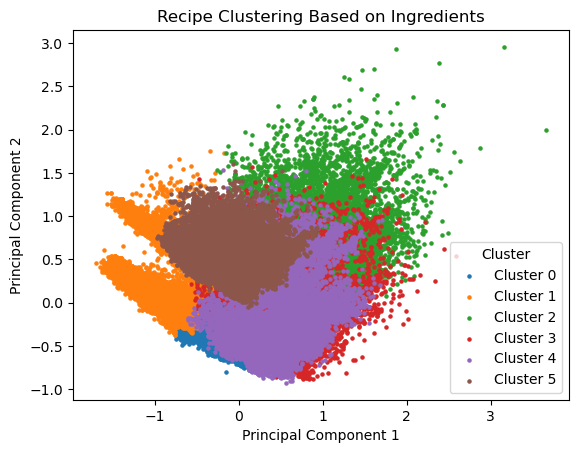

In [118]:
#look at the clusters by PCA

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
components = pca.fit_transform(X.toarray())
for cluster in sorted(df_singlet_ingredients['Cluster'].unique()):
    cluster_data = components[df_singlet_ingredients['Cluster'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}',  s= 5)

plt.title('Recipe Clustering Based on Ingredients')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Cluster")
plt.show()

- Step 3: Look at the top 10 ingredients from each cluster

In [132]:
#function top 10 ingredients from each cluster

def top_ingredients(df):
    ingredients_list = [ingredient for sublist in df['homogen_ingredient'] for ingredient in sublist]
    ingredient_counts = Counter(ingredients_list)
    # Get the top 10 ingredients
    top_10 = ingredient_counts.most_common(10)
    return pd.Series(dict(top_10), name='Top Ingredients')


In [134]:
top_ingredients_by_cluster = df_singlet_ingredients.groupby('Cluster').apply(top_ingredients).reset_index()

print(top_ingredients_by_cluster)


    Cluster      level_1  Top Ingredients
0         0        onion            11043
1         0        sugar            10494
2         0       butter             9722
3         0        water             8822
4         0    olive oil             6065
5         0        lemon             6027
6         0       pepper             5997
7         0          egg             5830
8         0         milk             5769
9         0  brown sugar             5356
10        1          egg            20553
11        1        sugar            17353
12        1       butter            10546
13        1      Qing Pi            10009
14        1        flour             8607
15        1    rye flour             7214
16        1      vanilla             6740
17        1         salt             5554
18        1      Ying Su             4508
19        1         milk             4102
20        2       tomato            23860
21        2        onion            10785
22        2    olive oil          

- Step 4: reassign individual rating to each recepe --> final dataframe to use for regression models for rating prediction

In [79]:
df_ingredients = df_singlet_ingredients[['RecipeId', 'homogen_ingredient','ingredient_vect', 'Cluster']]
df_review = df[['RecipeId', 'ReviewId', 'Rating']]

df_combined = pd.merge(df_ingredients,df_review, on='RecipeId', how='inner')

In [80]:
df_combined.head()

,RecipeId,homogen_ingredient,ingredient_vect,Cluster,ReviewId,Rating
0,38.0,"[lemon, sugar, yogurt, blueberry]","lemon, sugar, yogurt, blueberry",0,579149,5
1,38.0,"[lemon, sugar, yogurt, blueberry]","lemon, sugar, yogurt, blueberry",0,789264,4
2,38.0,"[lemon, sugar, yogurt, blueberry]","lemon, sugar, yogurt, blueberry",0,1448544,4
3,38.0,"[lemon, sugar, yogurt, blueberry]","lemon, sugar, yogurt, blueberry",0,1450744,4
4,39.0,"[lemon, onion, cashew, alghe, poppy seeds, min...","lemon, onion, cashew, alghe, poppy seeds, mint...",2,361851,3


**CONCLUSIONS**

- The correlation between nutrient content and calorie counts is both statistically significant and biologically plausible. Therefore, users can confidently rely on the nutritional information provided by this database.
- We created a DataFrame for subsequent regression analysis to recommend recipes to users based on their previous preferences and the ingredients in each recipe.